<a href="https://colab.research.google.com/github/AlexW0316/Sports-Analytics/blob/main/Elo_ten_years_4_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random, math

from google.colab import drive
drive.mount('/content/drive')


df_2010=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2010.csv')
df_2011=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2011.csv')
df_2012=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2012.csv')
df_2013=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2013.csv')
df_2014=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2014.csv')
df_2015=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2015.csv')
df_2016=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2016.csv')
df_2017=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2017.csv')
df_2018=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2018.csv')
df_2019=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/2019.csv')
FBS_2010=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2010.csv')
FBS_2011=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2011.csv')
FBS_2012=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2012.csv')
FBS_2013=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2013.csv')
FBS_2014=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2014.csv')
FBS_2015=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2015.csv')
FBS_2016=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2016.csv')
FBS_2017=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2017.csv')
FBS_2018=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2018.csv')
FBS_2019=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/FBS_2019.csv')
Rating_2010=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2010.csv')
Rating_2011=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2011.csv')
Rating_2012=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2012.csv')
Rating_2013=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2013.csv')
Rating_2014=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2014.csv')
Rating_2015=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2015.csv')
Rating_2016=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2016.csv')
Rating_2017=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2017.csv')
Rating_2018=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2018.csv')
Rating_2019=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/team_rating_2019.csv')
bet_2013=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/betting_2013.csv')
bet_2014=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/betting_2014.csv')
bet_2015=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/betting_2015.csv')
bet_2016=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/betting_2016.csv')
bet_2017=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/betting_2017.csv')
bet_2018=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/betting_2018.csv')
bet_2019=pd.read_csv('/content/drive/MyDrive/Sports Analytics/Data/betting_2019.csv')

Mounted at /content/drive


In [ ]:
df_list = [df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]
FBS_list = [FBS_2010, FBS_2011, FBS_2012, FBS_2013, FBS_2014, FBS_2015, FBS_2016, FBS_2017, FBS_2018, FBS_2019]
bet_list = [bet_2013, bet_2014, bet_2015, bet_2016, bet_2017, bet_2018, bet_2019]

#Ten year's data
df_total = []

for i in range(len(df_list)):
  df = df_list[i]
  fbs = FBS_list[i]
  name = fbs.loc[:,"school"]
  name = name.tolist()

  for row in df.to_dict('records'):
      team1 = row["home_team"]
      team2 = row["away_team"]

      if(team1 not in name or team2 not in name):
        continue

      if(row["week"] > 6 and row["week"] < 14):
        df_total.append(row)

df_all = pd.DataFrame(df_total)
df_all

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away_line_scores[0],away_line_scores[1],away_line_scores[2],away_line_scores[3],away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,302860276,2010,7,regular,2010-10-14T00:00:00.000Z,NaN,False,True,0.0,3775.0,...,7,7,14.0,7.0,0.753737,1573.0,1594.0,NaN,NaN,NaN
1,302872305,2010,7,regular,2010-10-14T23:30:00.000Z,NaN,False,True,0.0,3833.0,...,3,28,21.0,7.0,0.577246,1467.0,1620.0,NaN,NaN,NaN
2,302870277,2010,7,regular,2010-10-14T23:30:00.000Z,NaN,False,True,0.0,3842.0,...,0,3,3.0,0.0,0.070581,1526.0,1513.0,NaN,NaN,NaN
3,302880097,2010,7,regular,2010-10-16T00:00:00.000Z,NaN,False,True,0.0,3873.0,...,14,7,7.0,7.0,0.245592,1664.0,1668.0,NaN,NaN,NaN
4,302890228,2010,7,regular,2010-10-16T16:00:00.000Z,NaN,False,True,0.0,3836.0,...,0,7,0.0,0.0,0.592593,1426.0,1394.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,401114173,2019,13,regular,2019-11-24T03:00:00.000Z,NaN,False,True,35991.0,3619.0,...,14,0,14.0,7.0,0.996234,1989.0,1994.0,0.739685,https://www.youtube.com/watch?v=YaFn1i4mpZ8,NaN
3749,401114191,2019,13,regular,2019-11-24T03:00:00.000Z,NaN,False,True,44618.0,3726.0,...,0,0,7.0,7.0,0.038631,1795.0,1762.0,7.073290,NaN,NaN
3750,401117551,2019,13,regular,2019-11-24T03:30:00.000Z,NaN,False,True,32303.0,3660.0,...,14,0,14.0,7.0,0.915504,1135.0,1182.0,6.708995,https://www.youtube.com/watch?v=ozdTpS_PE74,NaN
3751,401117549,2019,13,regular,2019-11-24T03:30:00.000Z,NaN,False,True,18315.0,3905.0,...,21,21,14.0,0.0,0.996035,1731.0,1803.0,1.887455,https://www.youtube.com/watch?v=l2n-AIREO_Q,NaN


In [ ]:
def init_table(fbs_curr = None, fbs_past = None, last = None):
  name = fbs_curr.loc[:,"school"]
  name = name.tolist()
  elo_table=pd.DataFrame(np.zeros(shape=(len(name),16)))
  elo_table.index=name

  #init with previous year
  if last is not None:
    old_name = fbs_past.loc[:,"school"]
    old_name = old_name.tolist()
    new_team = []
    value = sorted(last)[:10]
    avg = sum(value)/len(value)
    avg_all = sum(last)/len(last)
    #check if new fbs team added, if yes, init with average of lowest 10 elo score
    for team in name:
      if team not in old_name:
        new_team.append(team)

    for i in range(16):
      elo_table[i] = last/3 + 2*avg_all/3

    for team in new_team:
      elo_table.loc[team] = avg

  else:
    for i in range(16):
      elo_table[i]=1500 #initialize with 1500

  return elo_table

#rt_table to calculate place
def train(elo_table, df_i, df_fbs, rt_t):
  name = df_fbs.loc[:,"school"]
  name = name.tolist()
  for index, row in df_i.iterrows():
    team1 = row["home_team"]
    team2 = row["away_team"]
    if(team1 not in name or team2 not in name):
      continue
    elo_1 = elo_table.loc[team1,row["week"]-1]
    elo_2 = elo_table.loc[team2,row["week"]-1]

    #print(list(rate_list[0][rate_list[0]["team"] == "USC"].iloc[0])[1])
    #print(rt_t[rt_t["team"] == team1].iloc[0])
    #print(rt_t[rt_t["team"] == team1].iloc[0])
    index_1 = list(rt_t[rt_t["team"] == team1].iloc[0])[1]
    index_2 = list(rt_t[rt_t["team"] == team2].iloc[0])[1]

#    index_1 = rt_table.loc[team1][0]
 #   index_2 = rt_table.loc[team2][0]
 #   percent = (len(rt_t) - abs(index_1 - index_2))/ len(rt_t)
    home_points = row["home_points"]
    away_points = row["away_points"]
  #  point_diff = home_points - away_points
  #  prob_real = 1/(1 + 10 ** (-point_diff / 25))

    if row["neutral_site"]=="FALSE":
      elo_1 += 55


    elo_diff = elo_1 - elo_2
    prob1 = 1/(1 + 10 ** (-elo_diff / 400))
    prob2 = 1 - prob1

    if row["neutral_site"]=="FALSE":
      elo_1 -= 55

    k = 25
    if(row["away_points"] > row["home_points"]):
      for i in range(row["week"], 16):
        elo_table.loc[(team1, i)] = elo_1 + k*(0 - prob1) ## set k = 25
        elo_table.loc[(team2, i)] = elo_2 + k*(1 - prob2) ## set k = 25
    else:
      for i in range(row["week"], 16):
        elo_table.loc[(team1, i)] = elo_1 + k*(1 - prob1) ## set k = 25
        elo_table.loc[(team2, i)] = elo_2 + k*(0 - prob2)

  return elo_table

In [ ]:
rate_list = [Rating_2010, Rating_2011, Rating_2012, Rating_2013, Rating_2014, Rating_2015, Rating_2016, Rating_2017, Rating_2018, Rating_2019]
rate_table = []
for r in rate_list:
  key = list(r["team"])
  value = list(r["points"])
  t = pd.DataFrame(value, index = key)
  rate_table.append(t)

list(rate_list[0][rate_list[0]["team"] == "USC"].iloc[0])[1]

3

In [ ]:
#init table for ten years
table_list = []
for i in range(len(df_list)):
  if i == 0:
    table_i = init_table(FBS_list[i])
    table_train_i = train(table_i, df_list[i], FBS_list[i], rate_list[i])
  else:
    table_i = init_table(FBS_list[i], FBS_list[i-1], table_list[i-1].iloc[:,-1])
    table_train_i = train(table_i, df_list[i], FBS_list[i], rate_list[i])
  table_list.append(table_train_i)


table_list[-1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Air Force,1457.706650,1457.706650,1457.706650,1470.874962,1460.189986,1471.580335,1458.029212,1471.418711,1483.881091,1497.059050,1507.901877,1507.901877,1517.799306,1525.095314,1536.015054,1536.015054
Akron,1444.993951,1432.370718,1421.724539,1409.068443,1399.130972,1386.920869,1386.920869,1375.227141,1365.037599,1354.773455,1343.385170,1343.385170,1334.189348,1326.722176,1318.569949,1318.569949
Alabama,1514.689123,1525.555043,1534.677775,1544.352827,1554.254081,1562.873608,1562.873608,1572.603991,1580.119915,1586.425134,1586.425134,1573.307029,1582.013713,1582.013713,1567.148923,1567.148923
Appalachian State,1502.097307,1502.097307,1512.647075,1512.647075,1522.908086,1533.046433,1533.046433,1543.890282,1552.970024,1559.555929,1544.086093,1553.335664,1562.610466,1569.248936,1577.992746,1588.963109
Arizona,1455.932801,1443.479449,1443.479449,1456.789036,1456.789036,1468.393763,1481.193272,1469.511558,1457.032958,1444.942052,1431.358313,1431.358313,1422.897835,1414.959837,1404.344847,1404.344847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Kentucky,1448.879050,1448.879050,1462.113535,1448.428611,1448.428611,1462.933271,1473.553664,1486.713543,1496.729733,1483.483024,1470.605550,1479.749159,1479.749159,1493.084878,1503.154610,1503.154610
Western Michigan,1468.533887,1468.533887,1456.596679,1468.787807,1456.239897,1467.381320,1455.474047,1467.719528,1454.534780,1464.954650,1464.954650,1476.387789,1488.082907,1488.082907,1473.437743,1473.437743
West Virginia,1477.578772,1477.578772,1464.575315,1478.189238,1489.379826,1489.379826,1477.740123,1465.333873,1456.185603,1456.185603,1446.267141,1432.897508,1447.374099,1436.910215,1450.062125,1450.062125
Wisconsin,1482.108478,1494.167050,1504.298100,1504.298100,1517.488239,1528.363634,1537.022026,1548.081593,1531.224568,1520.657597,1520.657597,1533.186197,1542.490265,1551.790593,1564.205399,1554.036947


In [ ]:
l = []
elo_1 = []
elo_2 = []
rating_1 = []
rating_2 = []
for index, row in df_all.iterrows():
    score1 = row["home_points"]
    score2 = row["away_points"]

    team1 = row["home_team"]
    team2 = row["away_team"]
    if score1 > score2:
      l.append(1)
    else:
      l.append(0)

    index_elo = row["season"]-2010
    index_week = row["week"]-1
    elo_table = table_list[index_elo]
    rt = rate_table[index_elo]
    elo_1.append(elo_table.loc[team1][index_week])
    elo_2.append(elo_table.loc[team2][index_week])

    if team1 not in rt.index or team2 not in rt.index:
      rating_1.append(None)
      rating_2.append(None)
      continue
    rating_1.append(rt.loc[team1][0])
    rating_2.append(rt.loc[team2][0])

df_all["test"] = l
df_all["elo_1"] = elo_1
df_all["elo_2"] = elo_2
df_all["rate_1"] = rating_1
df_all["rate_2"] = rating_2
df_all

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away_postgame_elo,excitement_index,highlights,notes,test,elo_1,elo_2,rate_1,rate_2,bet
0,302860276,2010,7,regular,2010-10-14T00:00:00.000Z,NaN,False,True,0.0,3775.0,...,1594.0,NaN,NaN,NaN,0,1463.490333,1510.752504,164.29,189.21,-21
1,302872305,2010,7,regular,2010-10-14T23:30:00.000Z,NaN,False,True,0.0,3833.0,...,1620.0,NaN,NaN,NaN,0,1486.246601,1500.433810,177.90,164.45,-52
2,302870277,2010,7,regular,2010-10-14T23:30:00.000Z,NaN,False,True,0.0,3842.0,...,1513.0,NaN,NaN,NaN,1,1513.291419,1509.441990,211.69,182.46,14
3,302880097,2010,7,regular,2010-10-16T00:00:00.000Z,NaN,False,True,0.0,3873.0,...,1668.0,NaN,NaN,NaN,0,1521.542293,1492.105557,197.18,184.21,-8
4,302890228,2010,7,regular,2010-10-16T16:00:00.000Z,NaN,False,True,0.0,3836.0,...,1394.0,NaN,NaN,NaN,1,1453.926283,1522.437144,218.08,205.67,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,401114173,2019,13,regular,2019-11-24T03:00:00.000Z,NaN,False,True,35991.0,3619.0,...,1994.0,0.739685,https://www.youtube.com/watch?v=YaFn1i4mpZ8,NaN,0,1422.897835,1555.825440,182.67,196.61,-28
3749,401114191,2019,13,regular,2019-11-24T03:00:00.000Z,NaN,False,True,44618.0,3726.0,...,1762.0,7.073290,NaN,NaN,1,1432.575115,1501.965772,194.55,259.19,6
3750,401117551,2019,13,regular,2019-11-24T03:30:00.000Z,NaN,False,True,32303.0,3660.0,...,1182.0,6.708995,https://www.youtube.com/watch?v=ozdTpS_PE74,NaN,0,1454.051874,1477.522565,153.50,145.27,-7
3751,401117549,2019,13,regular,2019-11-24T03:30:00.000Z,NaN,False,True,18315.0,3905.0,...,1803.0,1.887455,https://www.youtube.com/watch?v=l2n-AIREO_Q,NaN,0,1500.662557,1560.499933,149.92,189.93,-35


In [ ]:
# FBS Data for each year add change elo score
# effect of neutral site?
# skip audience
# test label as betting/win-loss

In [ ]:
def value(predict, test_x, df):
  sum = 0
  for i in range(len(test_x)):
    row = test_x.iloc[i]
    id = row["id"]
    predict_value = predict[i]


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

pipe = Pipeline([ ("transfer",make_column_transformer(
               (StandardScaler(), ['elo_1', 'elo_2', "rate_1", "rate_2"]))),
              # (OneHotEncoder(), ['home_team', 'away_team']))),
                 #("onehot", OneHotEncoder()),
                 #('sc', StandardScaler(with_mean=False)),
                 #   ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression())
                #    ('clf', RandomForestClassifier())
                 #  ('clf', KNeighborsClassifier(n_neighbors=100))
                    ])

res = []
mse_list = []
for i in range(10):
#train test split
    train, test = train_test_split(df_all, test_size=0.2)
   # train_x = train.iloc[:,1:-1]
    train_x = train[["elo_1", "elo_2","rate_1", "rate_2"]]
    train_y = train.iloc[:,-6]
    #test_x = test.iloc[:,1:-1]
    test_x = test[["elo_1", "elo_2", "rate_1", "rate_2"]]
    test_y = test.iloc[:,-6]

    pipe.fit(train_x, train_y)

    score = pipe.score(test_x, test_y)
    res.append(score)
    print(score)
    #print(metrics.f1_score(list(test_y), list(pipe.predict(test_x))))
    #print(metrics.mean_absolute_error(list(test_y), list(pipe.predict(test_x))))
    #print(value(pipe.predict(test_x), test_x, df_bet))

    print("mean", mean_squared_error(list(test_y), list(pipe.predict(test_x))))
    mse_list.append(mean_squared_error(list(test_y), list(pipe.predict(test_x))))

print(np.mean(res))
print(sum(mse_list)/len(mse_list))
#print(pipe.predict(test_x))
#metrics.precision_score(list(test_y), list(pipe.predict(test_x)))

0.725699067909454
mean 0.27430093209054596
0.6964047936085219
mean 0.303595206391478
0.7123834886817576
mean 0.28761651131824234
0.7323568575233023
mean 0.26764314247669774
0.7137150466045273
mean 0.2862849533954727
0.7137150466045273
mean 0.2862849533954727
0.7230359520639148
mean 0.2769640479360852
0.7043941411451398
mean 0.2956058588548602
0.677762982689747
mean 0.322237017310253
0.7123834886817576
mean 0.28761651131824234
0.7111850865512649
0.28881491344873506


In [ ]:
def test(table, df_i, df_fbs):
  l = []
  name = df_fbs.loc[:,"school"]
  name = name.tolist()

  for index, row in df_i.iterrows():
      team1 = row["home_team"]
      team2 = row["away_team"]
      if(team1 not in name or team2 not in name):
        continue

      if(row["week"] >= 4 and row["week"] < 14):
        rand = random.random()
        if(rand <= 0.2):
          l.append(row)

  if(len(table) == 16):
    predict = table.loc[:,15]
  else:
    predict = table.loc[:,15]

  count = 0
  y_predict = []
  y_true = []
  for row in l:
    team1 = row["home_team"]
    team2 = row["away_team"]
    point1 = row["home_points"]
    point2 = row["away_points"]


    elo_1 = predict.loc[team1]
    elo_2 = predict.loc[team2]

    if row["neutral_site"]=="FALSE":
      elo_1 += 55
    elo_diff = elo_1 - elo_2
    prob1 = 1/(1 + 10 ** (-elo_diff / 400))

    if(point1 < point2):
      count += math.log(1-prob1)
    elif(point1 > point2):
      count += math.log(prob1)

  return -count/len(l)

In [ ]:
accuracy = []
a = []
for i in range(1,len(df_list)):
  a.append(test(table_list[i], df_list[i], FBS_list[i]))

['Logistic', 'Elo']
[0.711185086551265, 0.545436756900533]


<BarContainer object of 2 artists>

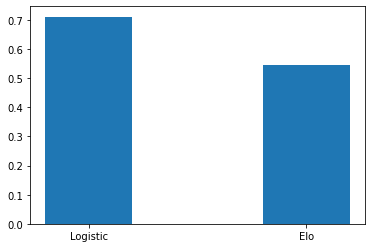

In [ ]:
import matplotlib.pyplot as plt
accuracy.append(1-(sum(mse_list)/len(mse_list)))
accuracy.append(sum(a)/len(a))
l = ["Logistic", "Elo"]
print(l)
print(accuracy)
plt.bar(l, accuracy, width = 0.4)

In [ ]:
tt = df_all[(df_all["week"] > 9) & (df_all["week"] < 16)]
tt_x = tt[["elo_1", "elo_2",'home_team', 'away_team', "rate_1", "rate_2"]]
tt_y = tt.iloc[:,-6]
pipe.score(tt_x, tt_y)

In [ ]:
temp = df_all.iloc[:,-6]
temp = temp.fillna(0)
for i in range(len(temp)):
    if temp[i] > 0:
        temp[i] = 1

df_all["excitement_index"] = temp

temp = df_all.iloc[:,8]
temp = temp.fillna(0)
for i in range(len(temp)):
    if temp[i] > 0:
        temp[i] = 1

df_all["attendance"] = temp

In [ ]:
df_all.isna().sum()

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
!pip install tensorflow-hub
!pip install tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
train_dataset = df_all.iloc[:,-6:-1].sample(frac=0.8,random_state=1)
test_dataset = df_all.iloc[:,-6:-1].drop(train_dataset.index)
train_labels = train_dataset.pop('test')
test_labels = test_dataset.pop('test')
train_stats = train_dataset.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_dataset)
X_train = scaler.transform(train_dataset)
X_test = scaler.transform(test_dataset)
X_train

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, train_labels,epochs=10, batch_size=1, verbose=1)

In [ ]:
score = model.evaluate(X_test, test_labels,verbose=1)
print(score)